In [89]:
!pip3 install essentia

In [90]:
!pip3 install madmom

In [91]:
!pip3 install mir_eval

The section below is all path dependent

In [92]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [93]:
import madmom

In [94]:
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [95]:
import mir_eval
from mir_eval import *

In [96]:
statsPath = 'drive/MyDrive/Bass/data/bjean/StudentStatistics_bjean.csv'
statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark "," TF 2 Mark ","Sound Quality Mark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [97]:
index = df_all.index
number_of_rows = len(index)



In [98]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<number_of_rows-1:
   sdeviatePath = 'drive/MyDrive/Bass/data/bjean/bjean_devs_student' + str(k+1)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   k+=1

In [99]:
import csv  
def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
      header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," TF 1 Mark "," TF 2 Mark ","Sound Quality Mark"," finalMark"]

      studentStatisticsArray= []
      idx = df.index
      number_of_rows = len(idx)
      k=0
      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df[" TF 2 Mark "].tolist()  
      list4 = df["Sound Quality Mark"].tolist()  
      list5 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
  
      for k in range(number_of_rows-1):
          print("===================================")

          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Std Dev. from 0:%f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1
          onset_X.append( list0[k])  # Martis mark
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Std Dev. from 0:%f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)
          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print(onset_summary)
          print(duration_summary)
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
          print("Final Mark = ", list5[k])
          studentStatistics = []
          studentStatistics.append(str(k+1))
          studentStatistics.append(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          print("F-measure = ", round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          studentStatisticsArray.append(studentStatistics)
    
      return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


Student 0 offset


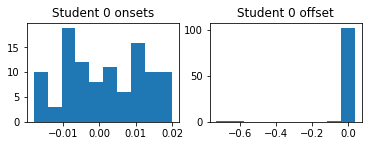

Onset Grade =  100.0 	 Duration Grade =  100.0
Onset ABS  Mean: 0.009429,Onset Mean: 0.001376, Std Dev. from 0:0.010761
Offset Mean: -0.009759, Std Dev. from 0:0.096131
Articulation Grade =  100.0 Sound Control Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
F-measure =  0.998
Student 1 offset


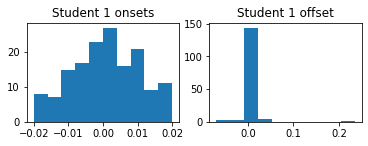

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.007855,Onset Mean: 0.000867, Std Dev. from 0:0.009658
Offset Mean: 0.001590, Std Dev. from 0:0.021096
Articulation Grade =  72.0 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
F-measure =  0.364
Student 2 offset


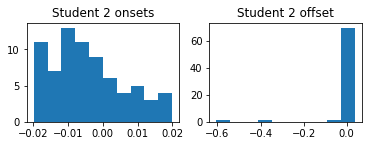

Onset Grade =  56.7 	 Duration Grade =  72.0
Onset ABS  Mean: 0.009907,Onset Mean: -0.004362, Std Dev. from 0:0.011607
Offset Mean: -0.012089, Std Dev. from 0:0.085090
Articulation Grade =  72.0 Sound Control Grade =  72.0 Volume Control Grade =  72.0
Final Mark =  2.7
F-measure =  0.558
Student 3 offset


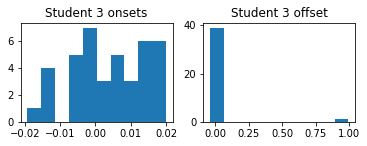

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009249,Onset Mean: 0.004237, Std Dev. from 0:0.011381
Offset Mean: 0.026244, Std Dev. from 0:0.157860
Articulation Grade =  79.2 Sound Control Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  3.6
F-measure =  0.254
Student 4 offset


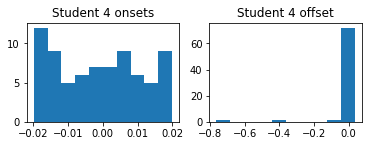

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.010686,Onset Mean: -0.000998, Std Dev. from 0:0.012389
Offset Mean: -0.015125, Std Dev. from 0:0.100551
Articulation Grade =  79.2 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  3.6
F-measure =  0.145
Student 5 offset


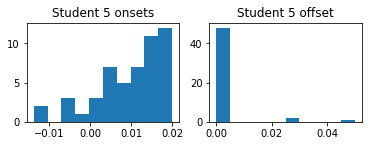

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.011722,Onset Mean: 0.010121, Std Dev. from 0:0.013061
Offset Mean: 0.002157, Std Dev. from 0:0.009182
Articulation Grade =  72.0 Sound Control Grade =  79.2 Volume Control Grade =  79.2
Final Mark =  2.7
F-measure =  0.262
Student 6 offset


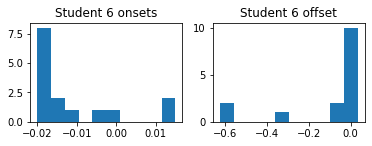

Onset Grade =  79.2 	 Duration Grade =  90.0
Onset ABS  Mean: 0.014707,Onset Mean: -0.010998, Std Dev. from 0:0.015709
Offset Mean: -0.101223, Std Dev. from 0:0.238094
Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  79.2
Final Mark =  4.05
F-measure =  0.175
Student 7 offset


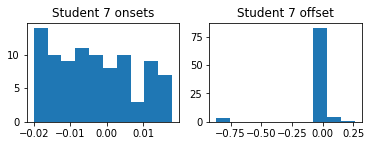

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009818,Onset Mean: -0.003178, Std Dev. from 0:0.011458
Offset Mean: -0.021835, Std Dev. from 0:0.156903
Articulation Grade =  79.2 Sound Control Grade =  72.0 Volume Control Grade =  56.7
Final Mark =  1.8
F-measure =  0.053
Student 8 offset


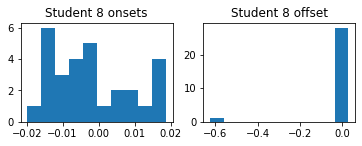

Onset Grade =  56.7 	 Duration Grade =  72.0
Onset ABS  Mean: 0.010122,Onset Mean: -0.002046, Std Dev. from 0:0.011611
Offset Mean: -0.022017, Std Dev. from 0:0.116383
Articulation Grade =  79.2 Sound Control Grade =  79.2 Volume Control Grade =  72.0
Final Mark =  2.7
F-measure =  0.309
Student 9 offset


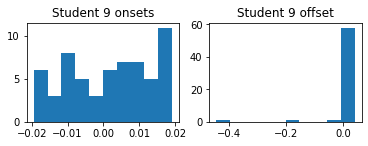

Onset Grade =  56.7 	 Duration Grade =  33.300000000000004
Onset ABS  Mean: 0.010748,Onset Mean: 0.001880, Std Dev. from 0:0.012177
Offset Mean: -0.005712, Std Dev. from 0:0.061775
Articulation Grade =  33.300000000000004 Sound Control Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.9
F-measure =  0.099
Student 10 offset


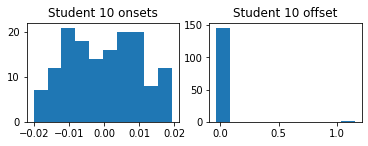

Onset Grade =  56.7 	 Duration Grade =  33.300000000000004
Onset ABS  Mean: 0.008649,Onset Mean: 0.000024, Std Dev. from 0:0.010145
Offset Mean: 0.016668, Std Dev. from 0:0.131932
Articulation Grade =  33.300000000000004 Sound Control Grade =  56.7 Volume Control Grade =  33.300000000000004
Final Mark =  0.0
F-measure =  0.214
Student 11 offset


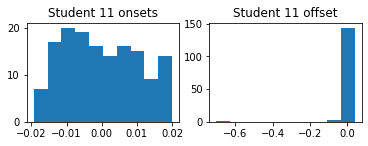

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009026,Onset Mean: 0.000016, Std Dev. from 0:0.010651
Offset Mean: -0.004578, Std Dev. from 0:0.058574
Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  3.6
F-measure =  0.587
Student 12 offset


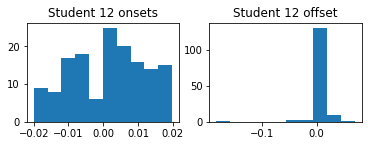

Onset Grade =  72.0 	 Duration Grade =  72.0
Onset ABS  Mean: 0.009129,Onset Mean: 0.001392, Std Dev. from 0:0.010820
Offset Mean: 0.000419, Std Dev. from 0:0.019095
Articulation Grade =  72.0 Sound Control Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  2.7
F-measure =  0.564
Student 13 offset


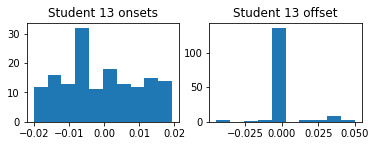

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009363,Onset Mean: -0.000710, Std Dev. from 0:0.010977
Offset Mean: 0.002428, Std Dev. from 0:0.012227
Articulation Grade =  79.2 Sound Control Grade =  72.0 Volume Control Grade =  79.2
Final Mark =  3.15
F-measure =  0.58
Student 14 offset


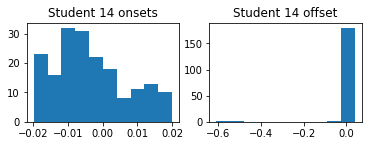

Onset Grade =  90.0 	 Duration Grade =  90.0
Onset ABS  Mean: 0.009416,Onset Mean: -0.003290, Std Dev. from 0:0.011091
Offset Mean: -0.003813, Std Dev. from 0:0.060820
Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
F-measure =  0.594


In [100]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [101]:
import pandas as pd


In [102]:
data_timing_onset0= { 'Reference Onset Deviation BJean' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['Reference Onset Deviation BJean'])
fig = px.histogram(df, x="Reference Onset Deviation BJean")
fig.show()

In [103]:

data_timing_duration0= { 'Reference Offset Deviation BJean' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['Reference Offset Deviation BJean'])
fig = px.histogram(df, x="Reference Offset Deviation BJean")
fig.show()

In [104]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/bjean/StudentStatistics_bjean.csv')

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
X = dataset[['f_measure_value','Onset ABS Mean']]#,]]

y=array(dataset['onsetMark'])
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('onset grades')

df = pd.DataFrame({'Actual Grade': y_test,'Predicted Grade': y_pred})
print(round(df,3))

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


onset grades
   Actual Grade  Predicted Grade
0     79.199997           73.288
1     79.199997           70.397
2     56.700001           72.640
3     56.700001           64.343
4     79.199997           81.822
Mean Absolute Error: 8.184
Root Mean Squared Error: 9.293


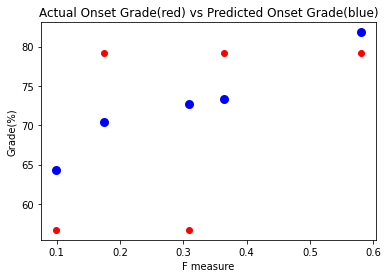

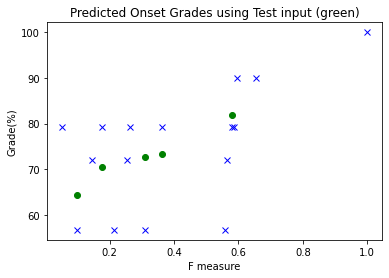

In [106]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Onset Grade(red) vs Predicted Onset Grade(blue)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.scatter(X_test["f_measure_value"].tolist(), y_test,  color='red')
plt.scatter(X_test["f_measure_value"].tolist(), y_pred, color='blue', linewidth=3)
plt.show()

plt.title('Predicted Onset Grades using Test input (green)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.plot(onset_f_measure_value_list,onset_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()


In [107]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataset[['f_measure_value','Duration ABS Mean']]
y=array(dataset[' DurationMark'])
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("duration grades")
df = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': y_pred})
print(round(df,3))

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3),'%')
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3),'%')


duration grades
   Actual Grade  Predicted Grade
0     79.199997           72.346
1     90.000000           59.667
2     72.000000           75.751
3     33.299999           67.407
4     79.199997           74.384
Mean Absolute Error: 15.972 %
Root Mean Squared Error: 20.821 %


[79.2 90.  72.  33.3 79.2]
[72.34623455 59.66746694 75.75112611 67.40683408 74.38369453]


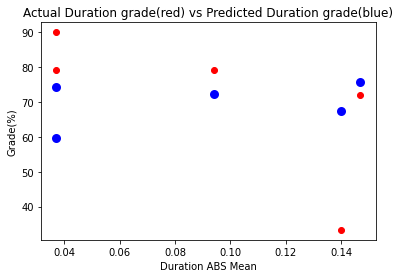

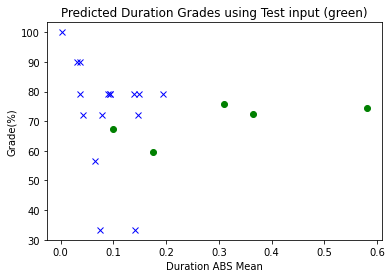

In [108]:
duration_mean_list = df_all["Duration Mean"].tolist()   
duration_amean_list = df_all["Duration ABS Mean"].tolist()   
duration_grade_list = df_all[" DurationMark"].tolist()   
duration_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Duration grade(red) vs Predicted Duration grade(blue)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_test,  color='red')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_pred, color='blue', linewidth=3)
print(y_test)
print(y_pred)
plt.show()

plt.title('Predicted Duration Grades using Test input (green)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.plot(duration_amean_list,duration_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()


In [109]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0    3.60   2.897992
1    4.05   0.529937
2    2.70   2.850211
3    0.90   3.306304
4    3.15   2.759079
Mean Absolute Error: 1.433901372748351
Root Mean Squared Error: 1.9416148337357226


In [114]:
X = dataset[['precision','recall','f_measure_value','Duration Mean','Onset Mean']]
y=array(dataset[' TF 1 Mark '])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

      Actual  Predicted
0  72.000000     68.183
1  90.000000     46.812
2  79.199997     75.321
3  33.299999     59.929
4  79.199997     77.032
Mean Absolute Error: 15.936
Root Mean Squared Error: 22.841


In [111]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' TF 2 Mark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  79.199997  82.306743
1  90.000000  77.707844
2  79.199997  84.835356
3  56.700001  75.214065
4  72.000000  86.350437
Mean Absolute Error: 10.779752438709938
Root Mean Squared Error: 12.175482272538968


In [112]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset['Sound Quality Mark'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  79.199997  72.505826
1  79.199997  65.031789
2  72.000000  71.088460
3  33.299999  61.900086
4  79.199997  87.433047
Mean Absolute Error: 11.721411192913527
Root Mean Squared Error: 15.047451917948973
